In [73]:
import nltk
from nltk.corpus import wordnet
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### 시소러스 기법
wordnet.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [4]:
car = wordnet.synset('car.n.01')   # 동의어 그룹
car.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [5]:
car.lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [6]:
### 상위어 경로 2개
car.hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('container.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('car.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('conveyance.n.03'),
  Synset('vehicle.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('car.n.01')]]

In [15]:
### 단어 사이의 유사도 구하기
car = wordnet.synset('car.n.01')
novel = wordnet.synset('novel.n.01')
dog = wordnet.synset('dog.n.01')
motorcycle = wordnet.synset('motorcycle.n.01')

car.path_similarity(novel)
car.path_similarity(dog)
car.path_similarity(motorcycle)

0.3333333333333333

In [22]:
### 통계 기반 기법
text = 'You say goodbye and I say hello.'
text = text.lower()
text = text.replace('.', ' .')
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [62]:
### 단어 ID와 단어 대응표
id_to_word = {}
word_to_id = {}

# word가 key값에 있으면
for word in words:
    if word not in word_to_id:
        idx = len(word_to_id)
        word_to_id[word] = idx 
        id_to_word[idx] = word

In [68]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [69]:
id_to_word[1]

'say'

In [71]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [72]:
word_to_id['say']

1

In [77]:
### 단어목록 -> 단어 ID 목록
corpus = []

for w in words:
    corpus.append(word_to_id[w])
    
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [81]:
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [83]:
### 말뭉치 함수
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    id_to_word = {}
    word_to_id = {}

    for word in words:
        if word not in word_to_id:
            idx = len(word_to_id)
            word_to_id[word] = idx 
            id_to_word[idx] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [89]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [90]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [91]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [92]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [94]:
### 동시발생 행렬 수동 입력
C = np.array([[0,1,0,0,0,0,0],[1,0,1,0,1,1,0],[0,1,0,1,0,0,0],[0,0,1,0,1,0,0],
              [0,1,0,1,0,0,0],[0,1,0,0,0,0,1],[0,0,0,0,0,1,0]], dtype=np.int32)
C

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [97]:
C[0]
C[4]
C[word_to_id['goodbye']]

array([0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [117]:
### 동시발생 행렬 자동화
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matirx = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matirx[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matirx[word_id, right_word_id] += 1
                
    return co_matirx

In [112]:
### 코사인 유사도
def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x**2)) + eps)
    ny = y / (np.sqrt(np.sum(y**2)) + eps)
    return np.dot(nx, ny)

In [121]:
### 유사도 구하기
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]

cos_similarity(c0, c1)

0.7071067691154799

In [248]:
### 검색어와 가장 유사도가 높은 단어 찾기
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    if query not in word_to_id:
        print(f'{query}을/를 찾을 수 없습니다.')
        return
    
    print(f'[query] {query}')
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    vocab_size = len(word_to_id)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(f'{id_to_word[i]}: {similarity[i]}')

        count += 1
        if count >= top:
            return

In [149]:
C = create_co_matrix(corpus, vocab_size)
most_similar('you', word_to_id, id_to_word, C, top=3)

[query] you
goodbye: 0.7071067691154799
i: 0.7071067691154799
hello: 0.7071067691154799


In [170]:
### PPMI(양의 상호정보량) 구현
def ppmi(C, verbose=True, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i,j] * N / (S[i]*S[j]) + eps)
            M[i,j] = max(0,pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total // 100 + 1) == 0:
                    print(f'{100*cnt/total:.1f} 완료')
                    
    return M

In [178]:
### 동시발생 행렬 -> PPMI 행렬
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C, verbose=False)

np.set_printoptions(precision=3)
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [188]:
### SVD에 의한 차원 감소
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C, verbose=False)

U, S, V = np.linalg.svd(W)

In [200]:
print(C[0])
print(W[0])
print(U[0])
print(U)

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01 -9.323e-01  0.000e+00
 -1.800e-16]
[[ 3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01 -9.323e-01  0.000e+00
  -1.800e-16]
 [ 0.000e+00 -5.976e-01  1.802e-01  0.000e+00  0.000e+00 -7.812e-01
   0.000e+00]
 [ 4.363e-01 -5.551e-17 -2.220e-16 -5.088e-01  2.253e-01 -1.388e-17
  -7.071e-01]
 [ 1.665e-16 -4.978e-01  6.804e-01  4.163e-17 -1.110e-16  5.378e-01
   8.668e-17]
 [ 4.363e-01 -3.124e-17 -1.600e-16 -5.088e-01  2.253e-01 -1.302e-17
   7.071e-01]
 [ 7.092e-01 -3.124e-17 -1.600e-16  6.839e-01  1.710e-01 -1.302e-17
  -6.013e-17]
 [-1.943e-16 -6.285e-01 -7.103e-01 -4.163e-17  2.220e-16  3.169e-01
  -1.116e-16]]


In [195]:
### 밀집벡터의 차원 감소
U[0,0:2]

array([ 3.409e-01, -1.110e-16], dtype=float32)

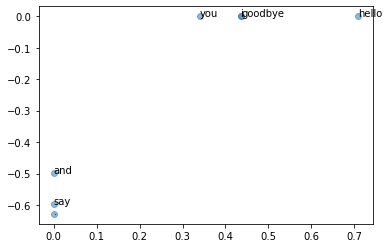

In [204]:
### 그래프 그리기
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:,0], U[:,1], alpha=0.5)

In [208]:
import os, sys
sys.path.append('..')
from dataset.ptb import *

In [223]:
### PTB 데이터셋
corpus, word_to_id, id_to_word = load_data()

print(f'말뭉치 크기 : {len(corpus)}')
print(f'corpus[:30] : {corpus[:30]}')
print()
print(f'id_to_word[0] : {id_to_word[0]}')
print(f'id_to_word[1] : {id_to_word[1]}')
print(f'id_to_word[2] : {id_to_word[2]}')
print()
print(f'word_to_id["car"] : {word_to_id["car"]}')
print(f'word_to_id["happy"] : {word_to_id["happy"]}')
print(f'word_to_id["lexus"] : {word_to_id["lexus"]}')

말뭉치 크기 : 929589
corpus[:30] : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0] : aer
id_to_word[1] : banknote
id_to_word[2] : berlitz

word_to_id["car"] : 3856
word_to_id["happy"] : 4428
word_to_id["lexus"] : 7426


In [229]:
from sklearn.utils.extmath import randomized_svd

In [232]:
window_size = 2
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size, window_size)
C.shape

(10000, 10000)

In [237]:
W = ppmi(C, verbose=False)

In [238]:
wordvec_size = 100
U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)

In [243]:
word_vecs = U[:, :wordvec_size]
word_vecs

array([[-2.606e-10,  3.651e-07,  1.508e-06, ..., -8.463e-05, -1.807e-05,
         6.406e-05],
       [-1.937e-11,  2.206e-08,  9.703e-08, ..., -1.270e-04, -2.684e-05,
         9.462e-05],
       [ 1.075e-12, -2.276e-08, -3.281e-08, ..., -1.725e-04, -3.423e-05,
         1.274e-04],
       ...,
       [ 4.428e-03, -6.479e-03,  1.148e-02, ..., -5.355e-04, -7.532e-03,
         1.483e-02],
       [ 2.462e-03, -4.899e-03,  8.017e-03, ..., -4.129e-03,  2.385e-03,
         2.029e-03],
       [ 3.895e-03, -7.803e-03,  8.056e-03, ..., -2.840e-03,  2.242e-03,
         1.862e-03]], dtype=float32)

In [250]:
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

[query] you
i: 0.7009450793266296
we: 0.6332400441169739
do: 0.558809757232666
someone: 0.5409772396087646
anybody: 0.5362870693206787
[query] year
month: 0.6786127090454102
quarter: 0.6256309151649475
last: 0.6174898147583008
fiscal: 0.6041795611381531
next: 0.5897749662399292
[query] car
luxury: 0.6826255321502686
auto: 0.6771713495254517
domestic: 0.6305776238441467
vehicle: 0.5832709074020386
truck: 0.5415369272232056
[query] toyota
motor: 0.7276226878166199
nissan: 0.7095350623130798
honda: 0.6855267286300659
motors: 0.6744861006736755
lexus: 0.6233911514282227
